In [1]:
import numpy as np

def density_bulge(r, z, q, r0, rt, gamma, rho0_bulge=1.1):
    """
    Calculate bulge density profile from Equation 5
    
    Parameters:
    r : galactocentric radius in plane (kpc)
    z : height above plane (kpc)
    q, r0, rt, gamma : bulge parameters from GR02 Table 4
    rho0_bulge : normalization constant (1.1 M☉/pc³)
    """
    numerator = np.sqrt(r**2 + (z**2)/(q**2))
    term1 = (numerator/r0)**(-gamma)
    term2 = np.exp(-(r**2 + (z**2)/(q**2))/rt**2)
    return rho0_bulge * term1 * term2

def density_disc(r, z, rm, rd, rz, rho0_disc=2.6):
    """
    Calculate disc density profile from Equation 5
    
    Parameters:
    r : galactocentric radius (kpc)
    z : height above plane (kpc)
    rm, rd, rz : disc parameters from GR02 Table 4
    rho0_disc : normalization constant (2.6 M☉/pc³)
    """
    exponent = -(rm/rd + r/rd + np.abs(z)/rz)
    return rho0_disc * np.exp(exponent)

def density_sphere(R, Re, b, rho0_sphere=13.1):
    """
    Calculate spheroid density profile from Equation 5
    
    Parameters:
    R : 3D galactocentric radius (kpc)
    Re, b : spheroid parameters from GR02 Table 4
    rho0_sphere : normalization constant (13.1 M☉/pc³)
    """
    ratio = R/Re
    return rho0_sphere * np.exp(-b * ratio**(1/4)) / ratio**(7/8)

# Example usage:
# These parameters should be replaced with actual values from GR02 Table 4
q = 0.5       # Example bulge axis ratio
r0 = 1.0      # Example bulge scale radius (kpc)
rt = 2.0      # Example bulge truncation radius (kpc)
gamma = 1.8   # Example bulge power-law index

rm = 3.0      # Example disc scale parameters (kpc)
rd = 2.5
rz = 0.3

Re = 2.0      # Example spheroid effective radius (kpc)
b = 7.67      # Typical value for spheroid parameter

# Calculate densities at a sample point
r_sample = 8.0   # kpc
z_sample = 0.1    # kpc
R_sample = np.sqrt(r_sample**2 + z_sample**2)

rho_b = density_bulge(r_sample, z_sample, q, r0, rt, gamma)
rho_d = density_disc(r_sample, z_sample, rm, rd, rz)
rho_s = density_sphere(R_sample, Re, b)

print(f"Bulge density: {rho_b:.2f} M☉/pc³")
print(f"Disc density: {rho_d:.2f} M☉/pc³") 
print(f"Spheroid density: {rho_s:.2f} M☉/pc³")

Bulge density: 0.00 M☉/pc³
Disc density: 0.02 M☉/pc³
Spheroid density: 0.00 M☉/pc³


/tmp/ipykernel_1238921/658710792.py:38: RuntimeWarning: divide by zero encountered in divide
  rho_s = rho0_sphere * np.exp(-b*(R/Re)**0.25) / (R/Re)**(7/8)


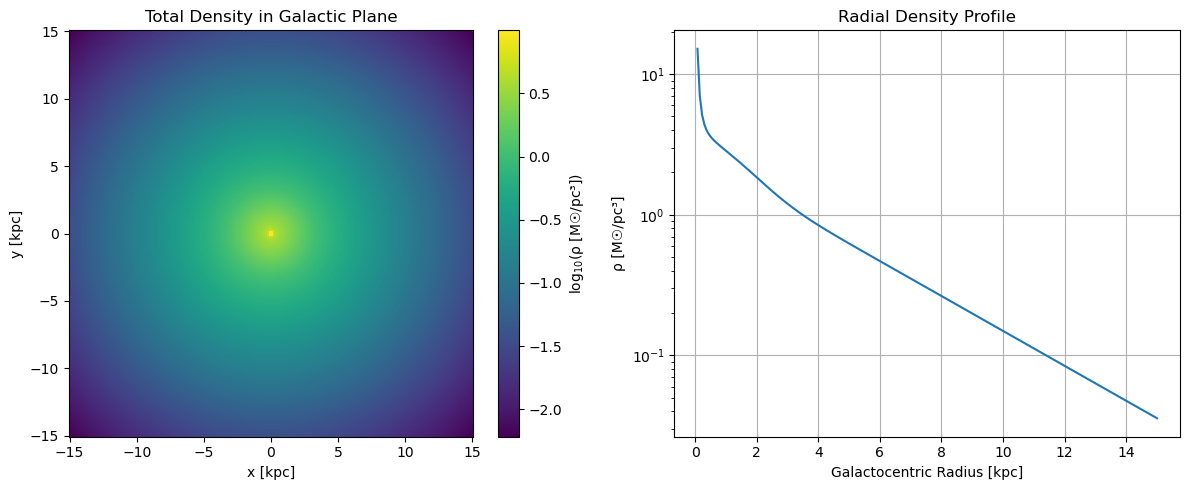

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters from GR02 (typical values)
# Bulge parameters
q = 0.5       # axis ratio
r0 = 1.0      # scale radius [kpc]
rt = 1.9      # truncation radius [kpc]
gamma = 0.0   # power-law index

# Disc parameters
rm = 0.0      # central hole radius [kpc]
rd = 3.5      # radial scale length [kpc]
rz = 0.3      # vertical scale height [kpc]

# Spheroid parameters
Re = 2.5      # effective radius [kpc]
b = 7.67      # shape parameter

# Normalization constants from paper
rho0_bulge = 1.1    # M☉/pc³
rho0_disc = 2.6      # M☉/pc³
rho0_sphere = 13.1   # M☉/pc³

def total_density(x, y, z=0):
    """Calculate combined density at position (x,y,z)"""
    r = np.sqrt(x**2 + y**2)
    R = np.sqrt(r**2 + z**2)
    
    # Bulge density
    rho_b = rho0_bulge * (np.sqrt(r**2 + (z/q)**2)/r0)**(-gamma) * \
            np.exp(-(r**2 + (z/q)**2)/rt**2)
    
    # Disc density
    rho_d = rho0_disc * np.exp(-(rm/rd + r/rd + np.abs(z)/rz))
    
    # Spheroid density
    rho_s = rho0_sphere * np.exp(-b*(R/Re)**0.25) / (R/Re)**(7/8)
    
    return rho_b + rho_d + rho_s

# Create grid in Galactic plane (z=0)
x = np.linspace(-15, 15, 200)  # kpc
y = np.linspace(-15, 15, 200)  # kpc
X, Y = np.meshgrid(x, y)

# Calculate densities
Z = total_density(X, Y)

# Plotting
plt.figure(figsize=(12, 5))

# 2D Density map
plt.subplot(121)
plt.pcolormesh(X, Y, np.log10(Z+1e-6), cmap='viridis', shading='auto')
plt.colorbar(label='log$_{10}$(ρ [M☉/pc³])')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.title('Total Density in Galactic Plane')

# Radial profile (along x-axis)
plt.subplot(122)
r_profile = np.linspace(0, 15, 200)
rho_profile = total_density(r_profile, 0)
plt.semilogy(r_profile, rho_profile)
plt.xlabel('Galactocentric Radius [kpc]')
plt.ylabel('ρ [M☉/pc³]')
plt.title('Radial Density Profile')
plt.grid(True)

plt.tight_layout()
plt.show()

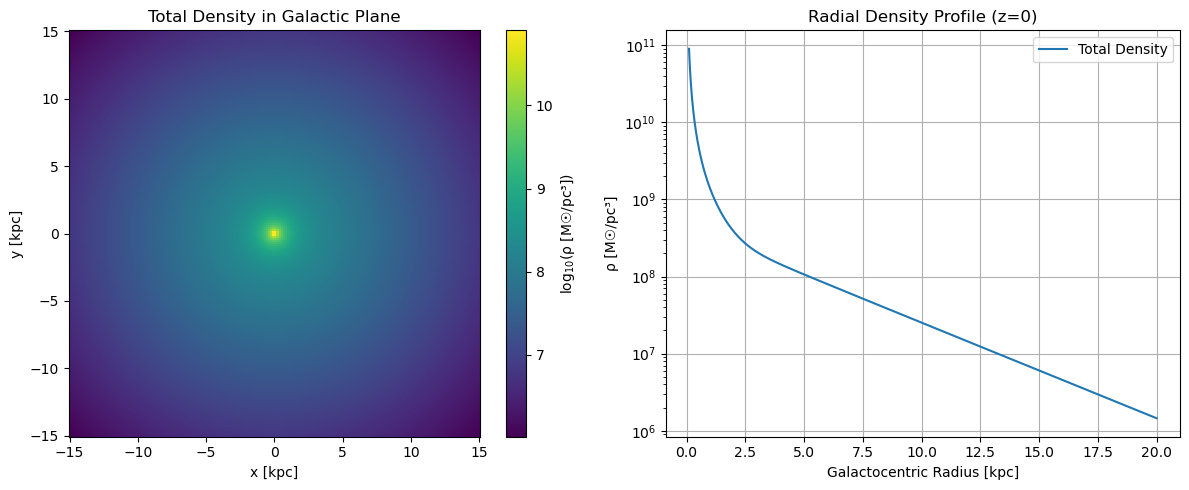

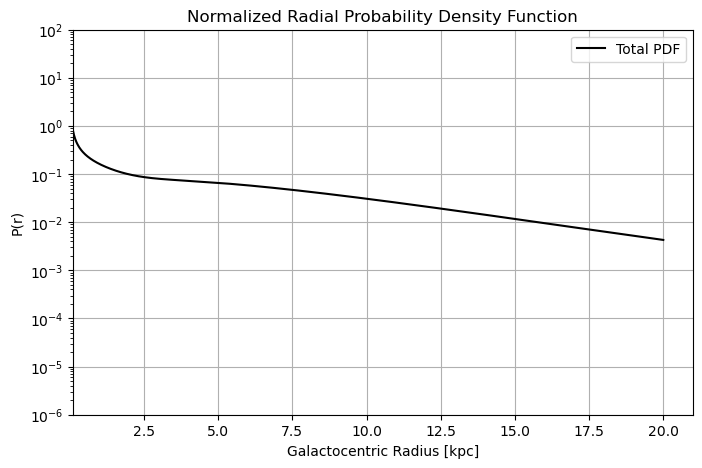

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters from GR02 (typical values)
# Bulge parameters
q = 0.6       # axis ratio
r0 = 1     # scale radius [kpc]
rt = 1.9      # truncation radius [kpc]
gamma = 1.8   # power-law index

# Disc parameters
rm = 6.5      # central hole radius [kpc]
rd = 3.5      # radial scale length [kpc]
rz = 0.41     # vertical scale height [kpc]

# Spheroid parameters
Re = 2.8      # effective radius [kpc]
b = 7.669     # shape parameter

# Normalization constants from paper
rho0_bulge = 1.19 *(10**9)    # M☉/pc³
rho0_disc = 2.79 *(10**9)   # M☉/pc³
rho0_sphere = 22.38 *(10**9)   # M☉/pc³

# ---------------------------------------------------------------------
# Define separate density functions for each component:
# ---------------------------------------------------------------------

def density_bulge(r, z=0):
    R_ell = np.sqrt(r**2 + (z/q)**2)
    epsilon = 1e-10  # Small value to avoid division by zero
    R_ell_safe = np.where(R_ell == 0, epsilon, R_ell)
    return rho0_bulge * ((R_ell_safe/r0)**(-gamma)) * np.exp(-(r**2 + (z/q)**2) / (rt**2))


def density_disc(r, z=0):
    """
    Disc density in cylindrical coordinates.
    At z=0 (and rm=0), this becomes: rho0_disc * exp(-r/rd)
    """
    return rho0_disc * np.exp(- (rm/rd + r/rd + np.abs(z)/rz))

def density_spheroid(r, z=0):
    """
    Spheroid density (spherically symmetric).
    Uses the spherical radius: R = sqrt(r^2 + z^2).
    At z=0, R = r.
    """
    R = np.sqrt(r**2 + z**2)
    # Avoid division by zero: if R == 0, substitute a small epsilon.
    epsilon = 1e-10
    R_safe = np.where(R == 0, epsilon, R)
    return rho0_sphere * np.exp(-b*(R_safe/Re)**0.25) / (R_safe/Re)**(7/8)

# ---------------------------------------------------------------------
# Define a total density function (for visualization) using the sum:
# ---------------------------------------------------------------------
def total_density(x, y, z=0):
    """Combined density evaluated at (x, y, z) using all three components."""
    r = np.sqrt(x**2 + y**2)
    return density_bulge(r, z) + density_disc(r, z) + density_spheroid(r, z)

# ---------------------------------------------------------------------
# Visualization of the 2D density map and radial density profile
# ---------------------------------------------------------------------

# Create grid in the Galactic plane (z=0)
x = np.linspace(-15, 15, 200)  # kpc
y = np.linspace(-15, 15, 200)  # kpc
X, Y = np.meshgrid(x, y)

# Calculate densities on a 2D grid (z=0)
Z = total_density(X, Y)

plt.figure(figsize=(12, 5))

# 2D Density map in the Galactic plane
plt.subplot(121)
plt.pcolormesh(X, Y, np.log10(Z+1e-6), cmap='viridis', shading='auto')
plt.colorbar(label='log$_{10}$(ρ [M☉/pc³])')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.title('Total Density in Galactic Plane')

# Radial profile (evaluated along the x-axis, z=0)
plt.subplot(122)
r_profile = np.linspace(0.1, 20, 1000)
rho_total_profile = total_density(r_profile, 0)
plt.semilogy(r_profile, rho_total_profile, label='Total Density')
plt.xlabel('Galactocentric Radius [kpc]')
plt.ylabel('ρ [M☉/pc³]')
plt.title('Radial Density Profile (z=0)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# Conversion to a 1D probability density function (PDF)
# ---------------------------------------------------------------------
# For the bulge and disc, we use the cylindrical Jacobian: dA = 2πr dr.
# For the spheroid, we use the spherical Jacobian: dV = 4πr² dr.

# Evaluate each component on the radial grid (at z=0):
rho_b_profile = density_bulge(r_profile, 0)
rho_d_profile = density_disc(r_profile, 0)
rho_s_profile = density_spheroid(r_profile, 0)

# Apply the appropriate Jacobian factors:
pdf_bulge = 2 * np.pi * r_profile * rho_b_profile      # Cylindrical for bulge
pdf_disc = 2 * np.pi * r_profile * rho_d_profile         # Cylindrical for disc
pdf_spheroid = 4 * np.pi * r_profile**2 * rho_s_profile    # Spherical for spheroid

# Sum the contributions to get the unnormalized radial PDF:
unnorm_pdf = pdf_bulge + pdf_disc + pdf_spheroid

# Normalize the PDF so that the integral over r equals 1:
norm_constant = np.trapz(unnorm_pdf, r_profile)
pdf_normalized = unnorm_pdf / norm_constant

# Normalize the PDF so that the integral over r equals 1:
norm_constant_bulge = np.trapz(pdf_bulge, r_profile)

# Normalize the PDF so that the integral over r equals 1:
norm_constant_disk = np.trapz(pdf_disc, r_profile)

# Normalize the PDF so that the integral over r equals 1:
norm_constant_spheroid = np.trapz(pdf_spheroid, r_profile)

# ---------------------------------------------------------------------
# Plot the normalized radial probability density function:
# ---------------------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(r_profile, pdf_normalized, 'k-', label='Total PDF')
# plt.plot(r_profile, pdf_bulge, 'b--', label='Bulge PDF')
# plt.plot(r_profile, pdf_disc, 'r--', label='Disc PDF')
# plt.plot(r_profile, pdf_spheroid, 'g--', label='Spheroid PDF')
# Set log scales
# plt.xscale('log')
plt.yscale('log')

# Optionally match the exact axis limits of the figure:
plt.xlim(1e-1)
plt.ylim([1e-6, 1e2])  # adjust to match your data range
plt.xlabel('Galactocentric Radius [kpc]')
plt.ylabel('P(r)')
plt.title('Normalized Radial Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()


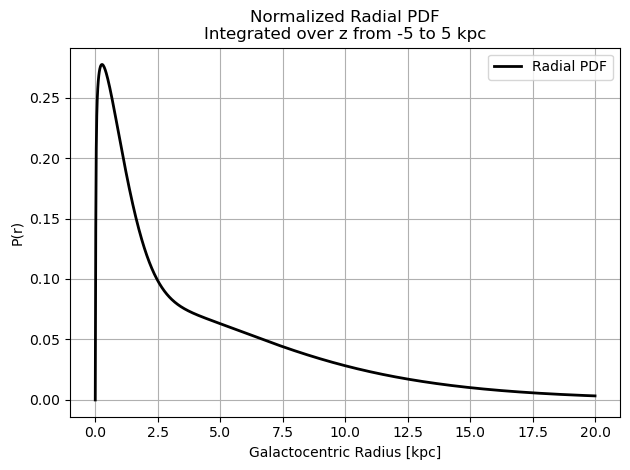

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters from GR02 (typical values)
# Bulge parameters
q = 0.6       # axis ratio
r0 = 1     # scale radius [kpc]
rt = 1.9      # truncation radius [kpc]
gamma = 1.8   # power-law index

# Disc parameters
rm = 6.5      # central hole radius [kpc]
rd = 3.5      # radial scale length [kpc]
rz = 0.41     # vertical scale height [kpc]

# Spheroid parameters
Re = 2.8      # effective radius [kpc]
b = 7.669     # shape parameter

# Normalization constants from paper
rho0_bulge = 1.19 *(10**9)    # M☉/pc³
rho0_disc = 2.79 *(10**9)   # M☉/pc³
rho0_sphere = 22.38 *(10**9)   # M☉/pc³

# ---------------------------------------------------------------------
# Define separate density functions for each component:
# ---------------------------------------------------------------------

def density_bulge(r, z=0):
    """
    Bulge density in cylindrical coordinates.
    Computes an 'elliptical' radius: R_ell = sqrt(r^2 + (z/q)^2).
    """
    R_ell = np.sqrt(r**2 + (z/q)**2)
    return rho0_bulge * (R_ell/r0)**(-gamma) * np.exp(-(r**2 + (z/q)**2) / rt**2)

def density_disc(r, z=0):
    """
    Disc density in cylindrical coordinates.
    At z=0 (and rm=0), this becomes: rho0_disc * exp(-r/rd)
    """
    return rho0_disc * np.exp(- (rm/rd + r/rd + np.abs(z)/rz))

def density_spheroid(r, z=0):
    """
    Spheroid density (assumed spherically symmetric).
    Uses the spherical radius: R = sqrt(r^2 + z^2).
    At z=0, R = r.
    """
    R = np.sqrt(r**2 + z**2)
    # Avoid division by zero: if R == 0, substitute a small epsilon.
    epsilon = 1e-10
    R_safe = np.where(R == 0, epsilon, R)
    return rho0_sphere * np.exp(-b*(R_safe/Re)**0.25) / (R_safe/Re)**(7/8)

def total_density(x, y, z=0):
    """
    Combined density evaluated at (x, y, z) using all three components.
    x and y are used to compute the cylindrical radius r.
    """
    r = np.sqrt(x**2 + y**2)
    return density_bulge(r, z) + density_disc(r, z) + density_spheroid(r, z)

# ---------------------------------------------------------------------
# Visualization: 2D Density Map in the Galactic Plane (z=0)
# ---------------------------------------------------------------------

# # Create grid in the Galactic plane (z=0)
# x = np.linspace(-15, 15, 200)  # kpc
# y = np.linspace(-15, 15, 200)  # kpc
# X, Y = np.meshgrid(x, y)

# # Calculate densities on the 2D grid (z=0)
# Z = total_density(X, Y)

# plt.figure(figsize=(12, 5))
# plt.subplot(121)
# plt.pcolormesh(X, Y, np.log10(Z + 1e-6), cmap='viridis', shading='auto')
# plt.colorbar(label='log$_{10}$(ρ [M☉/pc³])')
# plt.xlabel('x [kpc]')
# plt.ylabel('y [kpc]')
# plt.title('Total Density in Galactic Plane (z=0)')

# ---------------------------------------------------------------------
# Compute Radial Profile Integrated Over z from -5 kpc to 5 kpc
# ---------------------------------------------------------------------

# Define radial and vertical (z) grids
r_profile = np.linspace(0, 20, 1000)  # kpc
z_vals = np.linspace(-5, 5, 200)       # kpc

# Compute the integrated density (surface density) for each r:
Sigma_profile = np.zeros_like(r_profile)
for i, r in enumerate(r_profile):
    # Evaluate the total density at fixed r (with y=0) over the z range
    # Note: total_density(r, 0, z_vals) returns an array (because z_vals is an array)
    density_z = total_density(r, 0, z=z_vals)
    # Integrate density over z to obtain the surface density at radius r:
    Sigma_profile[i] = np.trapz(density_z, z_vals)

# Now, convert this integrated density into a radial probability density.
# The cylindrical area element is dA = 2πr dr.
unnorm_pdf =  Sigma_profile*(2 * np.pi * r_profile)

# Normalize the PDF so that its integral is 1:
norm_constant = np.trapz(unnorm_pdf, r_profile)
pdf_radial_normalized = unnorm_pdf / norm_constant

# ---------------------------------------------------------------------
# Plot the Normalized Radial PDF (Integrated Over z)
# ---------------------------------------------------------------------
plt.plot(r_profile, pdf_radial_normalized, 'k-', lw=2, label='Radial PDF')
plt.xlabel('Galactocentric Radius [kpc]')
plt.ylabel('P(r)')
plt.title('Normalized Radial PDF\nIntegrated over z from -5 to 5 kpc')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1799615/2047691530.py:123: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integrated_density[i] = simps(dens_z, z_vals)


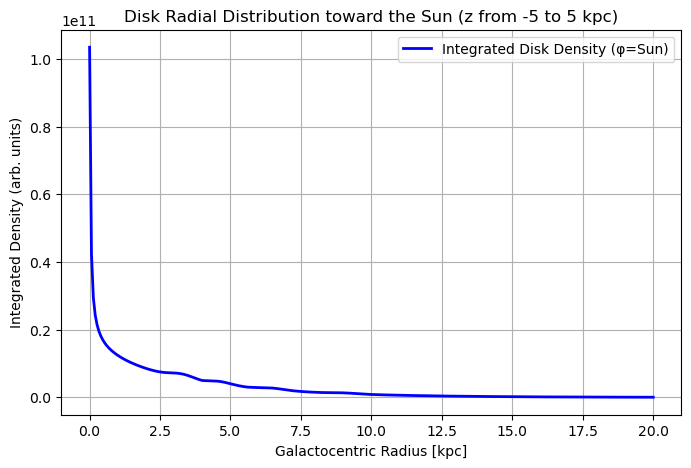

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# ----------------------------
# Model Parameters
# ----------------------------
# Parameters from GR02 (typical values)
# Bulge parameters
q = 0.6       # axis ratio
r0 = 1     # scale radius [kpc]
rt = 1.9      # truncation radius [kpc]
gamma = 1.8   # power-law index

# Disc parameters
rm = 6.5      # central hole radius [kpc]
rd = 3.5      # radial scale length [kpc]
rz = 0.41     # vertical scale height [kpc]

# Spheroid parameters
Re = 2.8      # effective radius [kpc]
b = 7.669     # shape parameter

# Normalization constants from paper
rho0_bulge = 1.19 *(10**9)    # M☉/pc³
rho0_disc = 2.79 *(10**9)   # M☉/pc³
rho0_sphere = 22.38 *(10**9)   # M☉/pc³

# Spiral arm parameters
w_a = 0.6               # width of spiral arm in kpc (600 pc)
pitch = np.deg2rad(12)  # pitch angle in radians (~12°)
phi0_list = np.array([0, np.pi/2, np.pi, 3*np.pi/2])
r_ref = rm  # reference radius for spiral arms

# ----------------------------
# Functions
# ----------------------------

def density_bulge(r, z=0):
    """
    Bulge density in cylindrical coordinates.
    Computes an 'elliptical' radius: R_ell = sqrt(r^2 + (z/q)^2).
    """
    R_ell = np.sqrt(r**2 + (z/q)**2)
    return rho0_bulge * (R_ell/r0)**(-gamma) * np.exp(-(r**2 + (z/q)**2) / rt**2)

# def density_disc(r, z=0):
#     """
#     Disc density in cylindrical coordinates.
#     At z=0 (and rm=0), this becomes: rho0_disc * exp(-r/rd)
#     """
#     return rho0_disc * np.exp(- (rm/rd + r/rd + np.abs(z)/rz))

def density_spheroid(r, z=0):
    """
    Spheroid density (assumed spherically symmetric).
    Uses the spherical radius: R = sqrt(r^2 + z^2).
    At z=0, R = r.
    """
    R = np.sqrt(r**2 + z**2)
    # Avoid division by zero: if R == 0, substitute a small epsilon.
    epsilon = 1e-10
    R_safe = np.where(R == 0, epsilon, R)
    return rho0_sphere * np.exp(-b*(R_safe/Re)**0.25) / (R_safe/Re)**(7/8)


def spiral_modulation(r, phi):
    """
    Computes the modulation factor due to spiral arms at a given (r, phi).
    Assumes a logarithmic spiral for each arm and returns a Gaussian
    factor based on the minimum distance from the spiral arms.
    """
    s_list = []
    for phi0 in phi0_list:
        # Logarithmic spiral: r_arm = r_ref * exp((phi - phi0)*tan(pitch))
        r_arm = r_ref * np.exp((phi - phi0) * np.tan(pitch))
        s_list.append(np.abs(r - r_arm))
    s_min = np.min(s_list)
    return np.exp(-(s_min / w_a)**2)

def density_disk_LMXB(x, y, z):
    """
    Returns the disk density at position (x,y,z) for LMXBs.
    The density decays exponentially in the radial and vertical directions,
    with an inner cutoff at r = rm and a 20% spiral modulation.
    """
    # Convert (x,y) to cylindrical coordinates
    r = np.sqrt(x**2 + y**2)
    # Apply inner cut-off: zero density for r < rm
    # if r < rm:
    #     return 0.0
    # Base density: exponential decay in r (after rm) and |z|
    base = rho0_disc * np.exp(-(r - rm)/rd - np.abs(z)/rz)
    # Spiral modulation factor (20% effect)
    phi = np.arctan2(y, x)
    mod_factor = 1 + 0.2 * spiral_modulation(r, phi)
    return (base + density_bulge(r, z) + density_spheroid(r, z)) * mod_factor

# ----------------------------
# Compute Radial Profile Toward the Sun
# ----------------------------
# Fix phi to the Sun's direction (φ = π/2)
phi_sun = np.pi / 2  

# Define an array of radial distances (in kpc) from the Galactic center
r_vals = np.linspace(0, 20, 300)

# Define z values for integration (from -5 kpc to 5 kpc)
z_vals = np.linspace(-5, 5, 300)

# Array to store the z-integrated density for each radius
integrated_density = np.zeros_like(r_vals)

# Loop over radial distances
for i, r in enumerate(r_vals):
    # In the fixed Sun direction:
    # x = r*cos(φ_sun) and y = r*sin(φ_sun) (note cos(π/2)=0 and sin(π/2)=1)
    x = r * np.cos(phi_sun)
    y = r * np.sin(phi_sun)
    # Calculate density along z at this (x,y)
    dens_z = np.array([density_disk_LMXB(x, y, z) for z in z_vals])
    # Numerically integrate the density over z (Simpson's rule)
    integrated_density[i] = simps(dens_z, z_vals)

# ----------------------------
# Plot the Radial Distribution
# ----------------------------
plt.figure(figsize=(8, 5))
plt.plot(r_vals, integrated_density, color='blue', lw=2, label='Integrated Disk Density (φ=Sun)')
plt.xlabel('Galactocentric Radius [kpc]')
plt.ylabel('Integrated Density (arb. units)')
plt.title('Disk Radial Distribution toward the Sun (z from -5 to 5 kpc)')
plt.legend()
plt.grid(True)
plt.show()


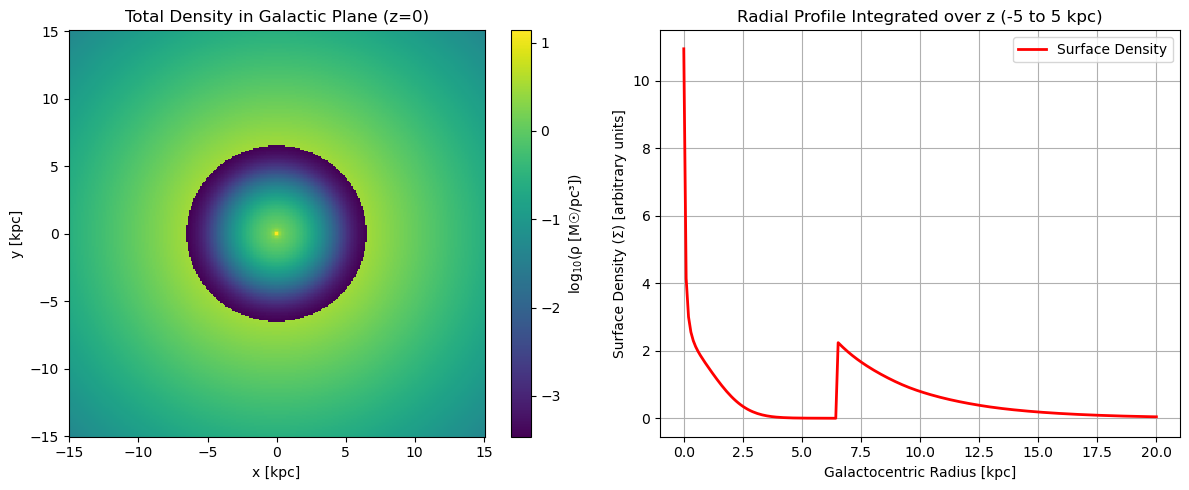

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ================================
# Parameters (inspired by Grimm et al. 2002)
# ================================

# Bulge parameters
q = 0.5       # axis ratio
r0 = 1.0      # scale radius [kpc]
rt = 1.9      # truncation radius [kpc]
gamma = 0.0   # power-law index

# Disk parameters for LMXBs (Grimm-style)
rm = 6.5      # inner disk cut-off [kpc]
rd = 3.5      # radial scale length [kpc]
rz = 0.41     # vertical scale height [kpc] (~410 pc)
rho0_disc = 2.6  # normalization for the disk component

# Spiral arm parameters
w_a = 0.6           # width of spiral arm in kpc (600 pc)
pitch = np.deg2rad(12)  # pitch angle (12° in radians)
# For a four-armed spiral, phases at: 0, pi/2, pi, 3pi/2
phi0_list = np.array([0, np.pi/2, np.pi, 3*np.pi/2])
r_ref = rm  # using the inner cut-off as reference

# Spheroid parameters
Re = 2.5      # effective radius [kpc]
b = 7.67      # shape parameter
rho0_sphere = 13.1  # normalization for spheroid

# ================================
# Define density functions
# ================================

def density_bulge(x, y, z=0):
    """Bulge density using an elliptical radius."""
    r_cyl = np.sqrt(x**2 + y**2)
    R_ell = np.sqrt(r_cyl**2 + (z/q)**2)
    return 1.1 * (R_ell/r0)**(-gamma) * np.exp(-(r_cyl**2 + (z/q)**2)/rt**2)

def spiral_modulation(r, phi):
    """
    Compute the spiral modulation factor.
    For each spiral arm j (with phase offset phi0_list), the arm follows
        r_arm = r_ref * exp((phi - phi0) * tan(pitch))
    and the distance to that arm is approximated by |r - r_arm|.
    The modulation factor is a Gaussian function of the minimum distance.
    """
    s_list = []
    for phi0 in phi0_list:
        r_arm = r_ref * np.exp((phi - phi0) * np.tan(pitch))
        s_list.append(np.abs(r - r_arm))
    s_min = np.min(s_list)
    return np.exp(- (s_min / w_a)**2)

def density_disk_LMXB(x, y, z=0):
    """
    Disk density for LMXBs following Grimm et al. (2002):
      - Zero for r < rm.
      - For r >= rm, the basic exponential profile:
            rho_disk = rho0_disc * exp[-(r - rm)/rd - |z|/rz]
        is modulated by the spiral pattern at the 20% level:
            [1 + 0.2 * spiral_modulation(r, phi)]
    """
    # Convert Cartesian (x,y) to cylindrical (r, phi)
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    
    if np.isscalar(r):
        if r < rm:
            return 0.0
        else:
            base = rho0_disc * np.exp(- (r - rm)/rd - np.abs(z)/rz)
            mod_factor = 1 + 0.2 * spiral_modulation(r, phi)
            return base * mod_factor
    else:
        base = rho0_disc * np.exp(- (r - rm)/rd - np.abs(z)/rz)
        mod_factor = 1 + 0.2 * spiral_modulation(r, phi)
        density = np.where(r < rm, 0.0, base * mod_factor)
        return density

def density_spheroid(x, y, z=0):
    """Spheroid density assuming spherical symmetry."""
    R = np.sqrt(x**2 + y**2 + z**2)
    epsilon = 1e-10
    R_safe = np.where(R==0, epsilon, R)
    return rho0_sphere * np.exp(-b*(R_safe/Re)**0.25) / (R_safe/Re)**(7/8)

def total_density(x, y, z=0):
    """
    Combined density as the sum of bulge, LMXB disk (with spiral modulation),
    and spheroid.
    """
    return density_bulge(x, y, z) + density_disk_LMXB(x, y, z) + density_spheroid(x, y, z)

# ================================
# Visualization: 2D density map in the Galactic plane (z=0)
# ================================
x_vals = np.linspace(-15, 15, 300)  # kpc
y_vals = np.linspace(-15, 15, 300)  # kpc
X, Y = np.meshgrid(x_vals, y_vals)
Z_plane = total_density(X, Y, z=0)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.pcolormesh(X, Y, np.log10(Z_plane+1e-6), cmap='viridis', shading='auto')
plt.colorbar(label='log$_{10}$(ρ [M☉/pc³])')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.title('Total Density in Galactic Plane (z=0)')

# ================================
# Compute radial profile integrated over z (-5 kpc to 5 kpc)
# ================================
# Extend radial bins to 20 kpc
r_profile = np.linspace(0, 20, 200)       # radii in kpc extended to 20 kpc
z_vals = np.linspace(-5, 5, 200)            # z from -5 to 5 kpc

# For each radius, average over azimuth and integrate over z:
Sigma_profile = np.zeros_like(r_profile)  # Surface density

n_phi = 300  # number of azimuthal samples
phi_vals = np.linspace(0, 2*np.pi, n_phi)

for i, r in enumerate(r_profile):
    sigma_phi = np.zeros(n_phi)
    for j, phi in enumerate(phi_vals):
        x_val = r * np.cos(phi)
        y_val = r * np.sin(phi)
        dens_z = total_density(x_val, y_val, z_vals)
        sigma_phi[j] = np.trapz(dens_z, z_vals)
    Sigma_profile[i] = np.mean(sigma_phi)

plt.subplot(122)
plt.plot(r_profile, Sigma_profile, 'r-', lw=2, label='Surface Density')
plt.xlabel('Galactocentric Radius [kpc]')
plt.ylabel('Surface Density (Σ) [arbitrary units]')
plt.title('Radial Profile Integrated over z (-5 to 5 kpc)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


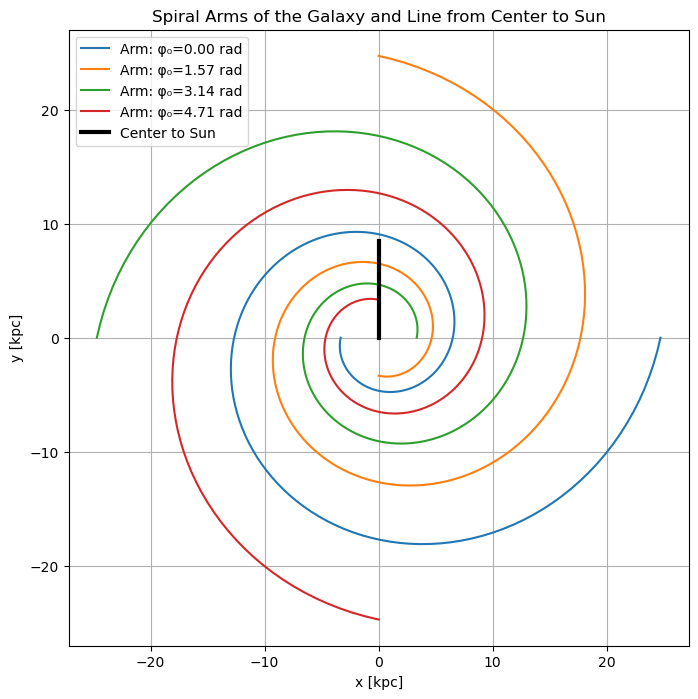

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Model Parameters
# ----------------------------
r_ref = 6.5          # Reference radius for the spiral arms (kpc)
pitch_deg = 12       # Pitch angle in degrees (~12°)
pitch = np.deg2rad(pitch_deg)  # Convert pitch angle to radians
phi0_list = np.array([0, np.pi/2, np.pi, 3*np.pi/2])  # Four arms equally spaced

# ----------------------------
# Plotting the Spiral Arms
# ----------------------------
plt.figure(figsize=(8, 8))

# Loop over each spiral arm defined by a starting angle phi0
for phi0 in phi0_list:
    # Define a range of phi values for this arm.
    # Here we choose phi from phi0 to phi0 + 2π (one full turn)
    phi_arm = np.linspace(phi0-np.pi, phi0 + 2*np.pi, 200)
    # Logarithmic spiral formula: r = r_ref * exp[(phi - phi0) * tan(pitch)]
    r_arm = r_ref * np.exp((phi_arm - phi0) * np.tan(pitch))
    # Convert polar to Cartesian coordinates
    x_arm = r_arm * np.cos(phi_arm)
    y_arm = r_arm * np.sin(phi_arm)
    plt.plot(x_arm, y_arm, label=f'Arm: φ₀={phi0:.2f} rad')

# ----------------------------
# Plot the line from Galactic center to the Sun
# ----------------------------
# In our coordinate system, we assume the Sun is at (x, y) = (0, 8.5 kpc)
sun_distance = 8.5  # kpc
# Sun's direction is fixed at φ = π/2 (along positive y-axis)
sun_x = sun_distance * np.cos(np.pi/2)  # Should be 0
sun_y = sun_distance * np.sin(np.pi/2)  # Should be 8.5
plt.plot([0, sun_x], [0, sun_y], 'k-', lw=3, label='Center to Sun')

# ----------------------------
# Plot formatting
# ----------------------------
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.title('Spiral Arms of the Galaxy and Line from Center to Sun')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


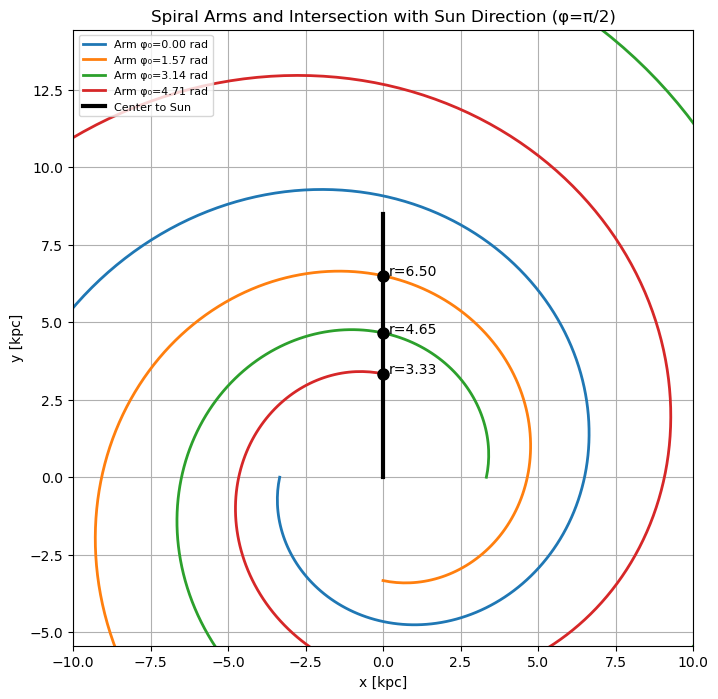

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Model Parameters
# ----------------------------
r_ref = 6.5               # Reference radius for spiral arms (kpc)
pitch_deg = 12            # Pitch angle in degrees (~12°)
pitch = np.deg2rad(pitch_deg)  # Convert pitch angle to radians
phi0_list = np.array([0, np.pi/2, np.pi, 3*np.pi/2])  # Four spiral arms
sun_distance = 8.5        # Sun's distance from Galactic center (kpc)
phi_sun = np.pi / 2       # Sun's direction in this model (along positive y-axis)

# ----------------------------
# Function to compute spiral arm curve
# ----------------------------
def spiral_arm(phi0, phi_range):
    """
    Returns (x, y) for a spiral arm starting at phase offset phi0,
    evaluated over a range of phi values.
    """
    r = r_ref * np.exp((phi_range - phi0) * np.tan(pitch))
    x = r * np.cos(phi_range)
    y = r * np.sin(phi_range)
    return x, y

# ----------------------------
# Create figure and plot spiral arms
# ----------------------------
plt.figure(figsize=(8,8))

# Define a range of phi values for each arm
phi_vals = np.linspace(0, 2*np.pi, 300)

# Plot each spiral arm
for phi0 in phi0_list:
    # Use phi from phi0 to phi0+2π for a full spiral turn
    phi_range = np.linspace(phi0-np.pi, phi0 + 2*np.pi, 300)
    x_arm, y_arm = spiral_arm(phi0, phi_range)
    plt.plot(x_arm, y_arm, lw=2, label=f'Arm φ₀={phi0:.2f} rad')

# ----------------------------
# Plot the line from the Galactic center to the Sun
# ----------------------------
# In our coordinate system, Sun is at (0, sun_distance) along φ = π/2.
plt.plot([0, 0], [0, sun_distance], 'k-', lw=3, label='Center to Sun')

# ----------------------------
# Compute and mark intersections of spiral arms with φ = π/2
# ----------------------------
# For a fixed φ = phi_sun, the spiral arm equation gives:
# r_intersect = r_ref * exp((phi_sun - phi0)*tan(pitch))
intersection_points = []
for phi0 in phi0_list:
    r_int = r_ref * np.exp((phi_sun - phi0) * np.tan(pitch))
    # Only consider intersections that lie within the Sun's distance:
    if r_int <= sun_distance:
        x_int = r_int * np.cos(phi_sun)
        y_int = r_int * np.sin(phi_sun)
        intersection_points.append((x_int, y_int))
        plt.plot(x_int, y_int, 'ko', markersize=8)  # mark the intersection
        plt.text(x_int+0.2, y_int, f'r={r_int:.2f}', fontsize=10, color='black')

# ----------------------------
# Formatting the plot
# ----------------------------
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.title('Spiral Arms and Intersection with Sun Direction (φ=π/2)')
plt.legend(loc='upper left', fontsize=8)
plt.grid(True)
plt.axis('equal')
plt.xlim(-10, 10)
plt.ylim(-1, 10)
plt.show()
